Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading Customer Dataset...
Dataset shape: (200, 5)

=== DATASET OVERVIEW ===
First 5 rows of customer data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
Total customers: 200
Features: 5

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Ge

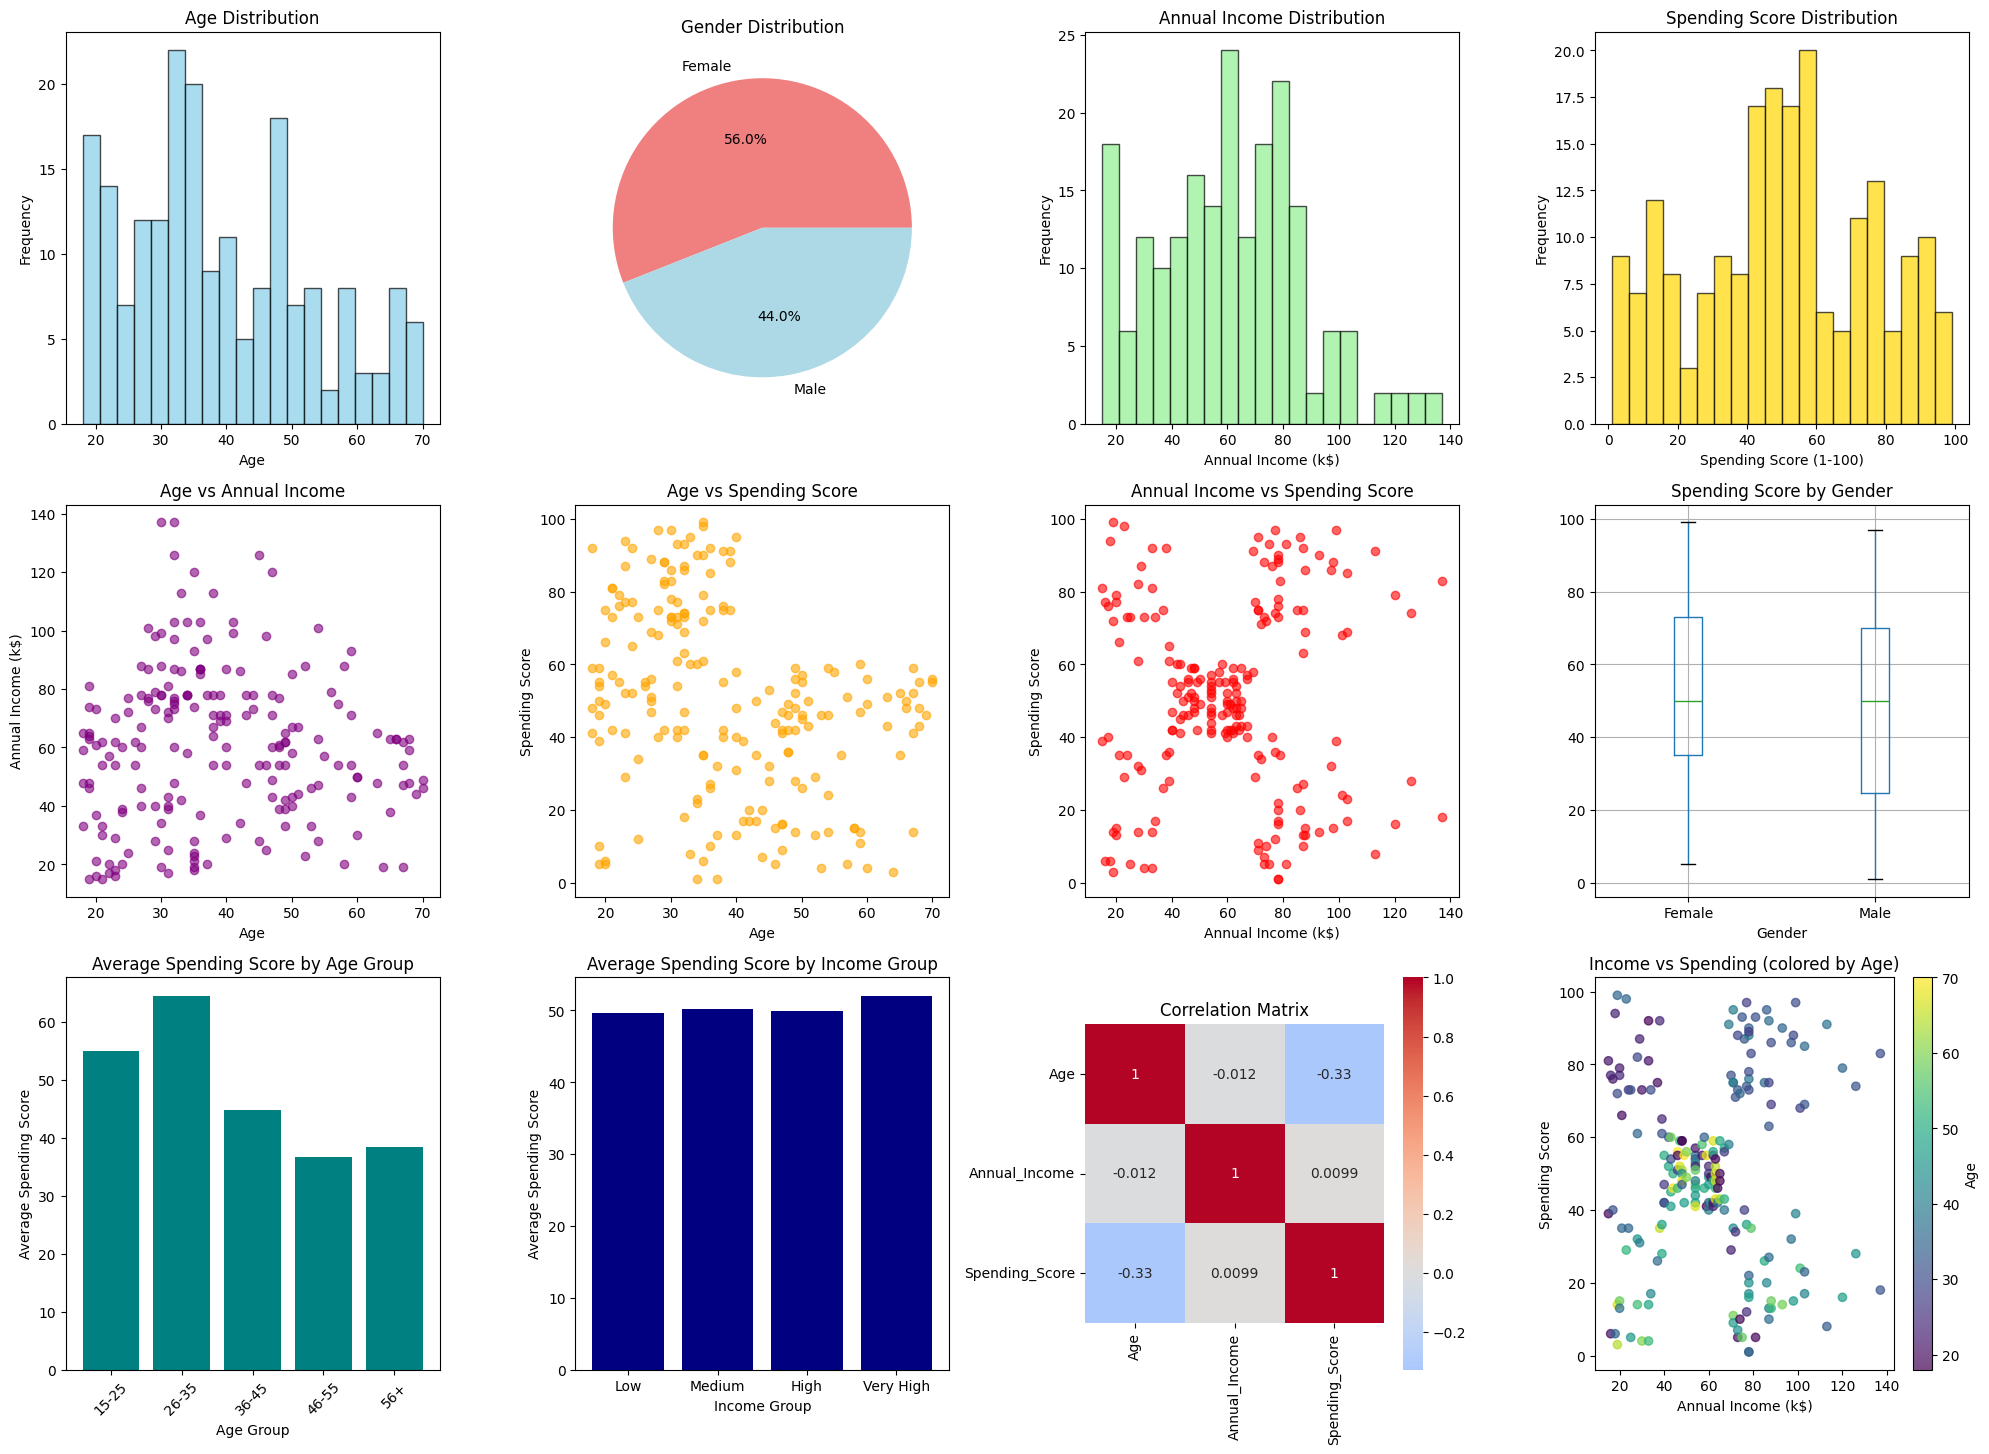


=== PREPARING DATA FOR CLUSTERING ===
Features selected for clustering:
1. Age
2. Annual_Income
3. Spending_Score

Clustering dataset shape: (200, 3)
Feature statistics:
              Age  Annual_Income  Spending_Score
count  200.000000     200.000000      200.000000
mean    38.850000      60.560000       50.200000
std     13.969007      26.264721       25.823522
min     18.000000      15.000000        1.000000
25%     28.750000      41.500000       34.750000
50%     36.000000      61.500000       50.000000
75%     49.000000      78.000000       73.000000
max     70.000000     137.000000       99.000000
✓ Features scaled for clustering

=== FINDING OPTIMAL NUMBER OF CLUSTERS ===
Calculating WCSS and Silhouette Scores...
K=2: WCSS=389.39, Silhouette Score=0.335
K=3: WCSS=295.21, Silhouette Score=0.358
K=4: WCSS=205.23, Silhouette Score=0.404
K=5: WCSS=168.25, Silhouette Score=0.417
K=6: WCSS=133.87, Silhouette Score=0.428
K=7: WCSS=117.01, Silhouette Score=0.417
K=8: WCSS=103.87, Silho

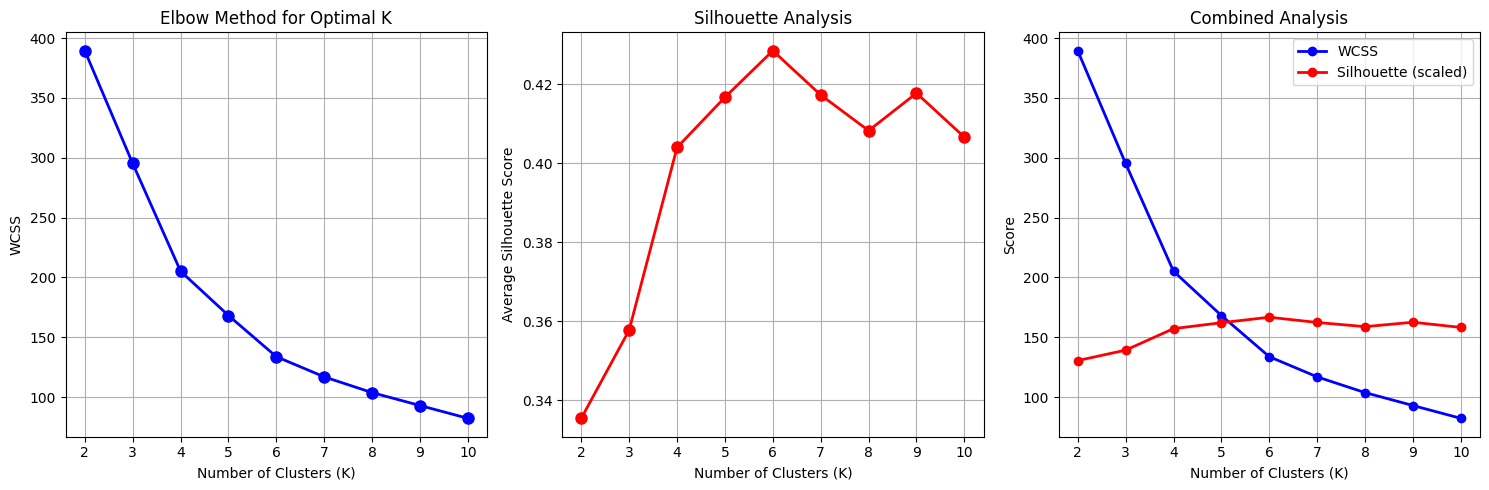


Optimal number of clusters based on Silhouette Score: 6

=== APPLYING K-MEANS CLUSTERING ===
✓ K-means clustering completed with 6 clusters
Final WCSS: 133.87
Final Silhouette Score: 0.428

=== CLUSTER ANALYSIS ===
Cluster distribution:
Cluster
0    45
1    39
2    33
3    39
4    23
5    21
Name: count, dtype: int64

Cluster characteristics:
               Age  Annual_Income  Spending_Score
Cluster                                          
0        56.333333      54.266667       49.066667
1        26.794872      57.102564       48.128205
2        41.939394      88.939394       16.969697
3        32.692308      86.538462       82.128205
4        25.000000      25.260870       77.608696
5        45.523810      26.285714       19.380952

Cluster Centers (Original Scale):
               Age  Annual_Income  Spending_Score
Cluster                                          
0        56.333333      54.266667       49.066667
1        26.794872      57.102564       48.128205
2        41.939394 

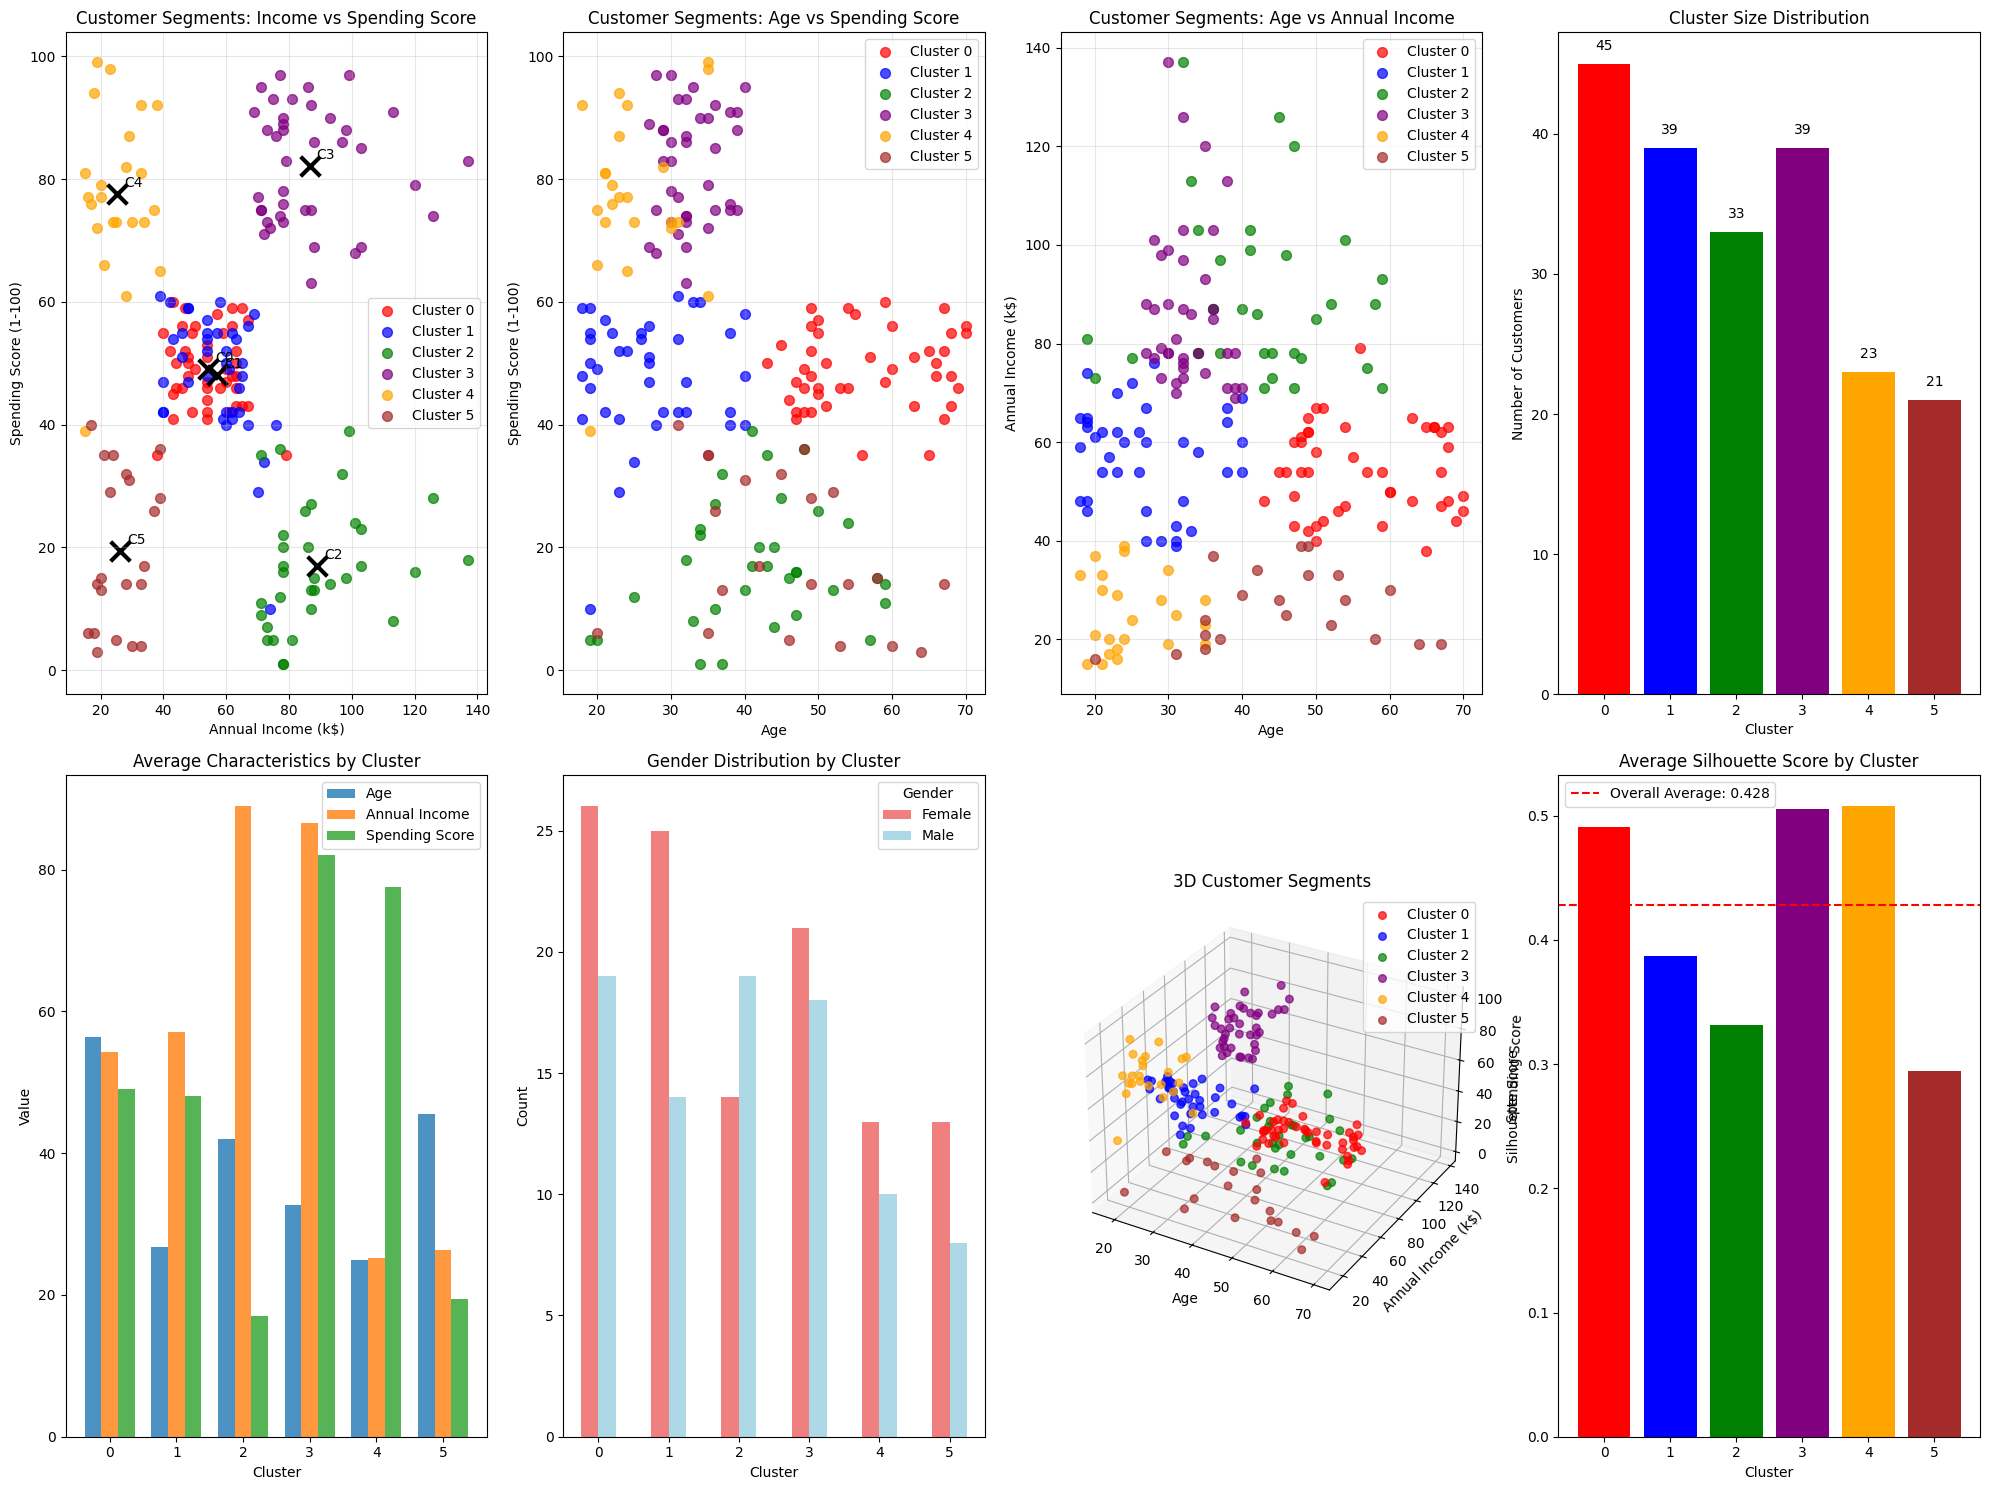


=== CUSTOMER PROFILING ===
Customer Personas:

Cluster 0: 🎯 Average Customers
  • Size: 45 customers
  • Age: 56.3 ± 8.5 years
  • Income: $54.3k ± $9.0k
  • Spending: 49.1 ± 6.3
  • Gender: {'Female': np.int64(26), 'Male': np.int64(19)}

Cluster 1: 🎯 Average Customers
  • Size: 39 customers
  • Age: 26.8 ± 7.1 years
  • Income: $57.1k ± $10.2k
  • Spending: 48.1 ± 10.0
  • Gender: {'Female': np.int64(25), 'Male': np.int64(14)}

Cluster 2: 💎 High Income, Low Spending
  • Size: 33 customers
  • Age: 41.9 ± 10.2 years
  • Income: $88.9k ± $16.6k
  • Spending: 17.0 ± 10.0
  • Gender: {'Male': np.int64(19), 'Female': np.int64(14)}

Cluster 3: 👑 Premium Customers
  • Size: 39 customers
  • Age: 32.7 ± 3.7 years
  • Income: $86.5k ± $16.3k
  • Spending: 82.1 ± 9.4
  • Gender: {'Female': np.int64(21), 'Male': np.int64(18)}

Cluster 4: 🛍️ Trendy Shoppers
  • Size: 23 customers
  • Age: 25.0 ± 5.3 years
  • Income: $25.3k ± $7.7k
  • Spending: 77.6 ± 13.3
  • Gender: {'Female': np.int64(13), '

In [ ]:
# Customer Segmentation using K-means Clustering
# Dataset: Mall Customers Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
data_path = '/content/drive/My Drive/Internship_Project/Mall_coustomers/Mall_Customers.csv'

print("Loading Customer Dataset...")
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")

# Display basic information about the dataset
print("\n=== DATASET OVERVIEW ===")
print("First 5 rows of customer data:")
print(df.head())

print(f"\nDataset Info:")
print(f"Total customers: {len(df)}")
print(f"Features: {len(df.columns)}")

print("\nColumn Information:")
print(df.info())

print("\nDataset Description:")
print(df.describe())

# Check for missing values
print(f"\n=== DATA QUALITY CHECK ===")
print("Missing values:")
print(df.isnull().sum())

print("\nColumn Names:")
print(df.columns.tolist())

# Rename columns for easier handling (if needed)
if 'CustomerID' in df.columns:
    df = df.rename(columns={'CustomerID': 'Customer_ID'})
if 'Annual Income (k$)' in df.columns:
    df = df.rename(columns={'Annual Income (k$)': 'Annual_Income'})
if 'Spending Score (1-100)' in df.columns:
    df = df.rename(columns={'Spending Score (1-100)': 'Spending_Score'})

print("\nUpdated Column Names:")
print(df.columns.tolist())

# Exploratory Data Analysis
print(f"\n=== EXPLORATORY DATA ANALYSIS ===")

# Gender distribution
print("Gender Distribution:")
print(df['Gender'].value_counts())

# Age distribution
print(f"\nAge Statistics:")
print(df['Age'].describe())

# Annual Income distribution
print(f"\nAnnual Income Statistics:")
print(df['Annual_Income'].describe())

# Spending Score distribution
print(f"\nSpending Score Statistics:")
print(df['Spending_Score'].describe())

# Create comprehensive visualizations
plt.figure(figsize=(20, 15))

# Plot 1: Age distribution
plt.subplot(3, 4, 1)
plt.hist(df['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plot 2: Gender distribution
plt.subplot(3, 4, 2)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Gender Distribution')

# Plot 3: Annual Income distribution
plt.subplot(3, 4, 3)
plt.hist(df['Annual_Income'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

# Plot 4: Spending Score distribution
plt.subplot(3, 4, 4)
plt.hist(df['Spending_Score'], bins=20, alpha=0.7, color='gold', edgecolor='black')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

# Plot 5: Age vs Annual Income
plt.subplot(3, 4, 5)
plt.scatter(df['Age'], df['Annual_Income'], alpha=0.6, color='purple')
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

# Plot 6: Age vs Spending Score
plt.subplot(3, 4, 6)
plt.scatter(df['Age'], df['Spending_Score'], alpha=0.6, color='orange')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')

# Plot 7: Annual Income vs Spending Score
plt.subplot(3, 4, 7)
plt.scatter(df['Annual_Income'], df['Spending_Score'], alpha=0.6, color='red')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

# Plot 8: Gender-wise spending patterns
plt.subplot(3, 4, 8)
df.boxplot(column='Spending_Score', by='Gender', ax=plt.gca())
plt.title('Spending Score by Gender')
plt.suptitle('')

# Plot 9: Age groups analysis
plt.subplot(3, 4, 9)
age_groups = pd.cut(df['Age'], bins=[15, 25, 35, 45, 55, 70], labels=['15-25', '26-35', '36-45', '46-55', '56+'])
age_spending = df.groupby(age_groups)['Spending_Score'].mean()
plt.bar(age_spending.index, age_spending.values, color='teal')
plt.title('Average Spending Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending Score')
plt.xticks(rotation=45)

# Plot 10: Income groups analysis
plt.subplot(3, 4, 10)
income_groups = pd.cut(df['Annual_Income'], bins=[0, 30, 60, 90, 140], labels=['Low', 'Medium', 'High', 'Very High'])
income_spending = df.groupby(income_groups)['Spending_Score'].mean()
plt.bar(income_spending.index, income_spending.values, color='navy')
plt.title('Average Spending Score by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Spending Score')

# Plot 11: Correlation heatmap
plt.subplot(3, 4, 11)
numerical_cols = ['Age', 'Annual_Income', 'Spending_Score']
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix')

# Plot 12: 3D scatter preparation data
plt.subplot(3, 4, 12)
plt.scatter(df['Annual_Income'], df['Spending_Score'], c=df['Age'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Age')
plt.title('Income vs Spending (colored by Age)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

plt.tight_layout()
plt.show()

# Prepare data for clustering
print(f"\n=== PREPARING DATA FOR CLUSTERING ===")

# Select features for clustering
# We'll use Age, Annual Income, and Spending Score
clustering_features = ['Age', 'Annual_Income', 'Spending_Score']
X = df[clustering_features].copy()

print("Features selected for clustering:")
for i, feature in enumerate(clustering_features, 1):
    print(f"{i}. {feature}")

print(f"\nClustering dataset shape: {X.shape}")
print("Feature statistics:")
print(X.describe())

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✓ Features scaled for clustering")

# Determine optimal number of clusters using Elbow Method
print(f"\n=== FINDING OPTIMAL NUMBER OF CLUSTERS ===")

# Elbow Method
wcss = []  # Within Cluster Sum of Squares
silhouette_scores = []
K_range = range(2, 11)

print("Calculating WCSS and Silhouette Scores...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"K={k}: WCSS={kmeans.inertia_:.2f}, Silhouette Score={silhouette_avg:.3f}")

# Plot Elbow Method and Silhouette Analysis
plt.figure(figsize=(15, 5))

# Elbow Method Plot
plt.subplot(1, 3, 1)
plt.plot(K_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)

# Silhouette Score Plot
plt.subplot(1, 3, 2)
plt.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)

# Combined Analysis
plt.subplot(1, 3, 3)
plt.plot(K_range, wcss, 'bo-', label='WCSS', linewidth=2)
plt.plot(K_range, [score * max(wcss) for score in silhouette_scores], 'ro-', label='Silhouette (scaled)', linewidth=2)
plt.title('Combined Analysis')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Select optimal number of clusters
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_k}")

# Apply K-means clustering with optimal K
print(f"\n=== APPLYING K-MEANS CLUSTERING ===")
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans_optimal.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = cluster_labels

print(f"✓ K-means clustering completed with {optimal_k} clusters")
print(f"Final WCSS: {kmeans_optimal.inertia_:.2f}")
print(f"Final Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.3f}")

# Analyze clusters
print(f"\n=== CLUSTER ANALYSIS ===")
print("Cluster distribution:")
print(df['Cluster'].value_counts().sort_index())

print("\nCluster characteristics:")
cluster_summary = df.groupby('Cluster')[clustering_features].mean()
print(cluster_summary)

# Calculate cluster centers in original scale
cluster_centers_scaled = kmeans_optimal.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers_scaled)
centers_df = pd.DataFrame(cluster_centers_original, columns=clustering_features)
centers_df.index.name = 'Cluster'

print(f"\nCluster Centers (Original Scale):")
print(centers_df)

# Detailed cluster analysis
print(f"\n=== DETAILED CLUSTER INSIGHTS ===")
for cluster_id in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"\n--- CLUSTER {cluster_id} ---")
    print(f"Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"Average Age: {cluster_data['Age'].mean():.1f} years")
    print(f"Average Annual Income: ${cluster_data['Annual_Income'].mean():.1f}k")
    print(f"Average Spending Score: {cluster_data['Spending_Score'].mean():.1f}")
    print(f"Gender Distribution: {cluster_data['Gender'].value_counts().to_dict()}")

# Visualization of clusters
plt.figure(figsize=(20, 15))

# 2D Clustering Visualizations
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Plot 1: Annual Income vs Spending Score
plt.subplot(2, 4, 1)
for cluster_id in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Annual_Income'], cluster_data['Spending_Score'],
                c=colors[cluster_id], label=f'Cluster {cluster_id}', alpha=0.7, s=50)

# Plot cluster centers
for i, center in enumerate(centers_df.values):
    plt.scatter(center[1], center[2], c='black', marker='x', s=200, linewidths=3)
    plt.annotate(f'C{i}', (center[1], center[2]), xytext=(5, 5), textcoords='offset points')

plt.title('Customer Segments: Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Age vs Spending Score
plt.subplot(2, 4, 2)
for cluster_id in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Age'], cluster_data['Spending_Score'],
                c=colors[cluster_id], label=f'Cluster {cluster_id}', alpha=0.7, s=50)

plt.title('Customer Segments: Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Age vs Annual Income
plt.subplot(2, 4, 3)
for cluster_id in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Age'], cluster_data['Annual_Income'],
                c=colors[cluster_id], label=f'Cluster {cluster_id}', alpha=0.7, s=50)

plt.title('Customer Segments: Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Cluster size distribution
plt.subplot(2, 4, 4)
cluster_counts = df['Cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values, color=[colors[i] for i in cluster_counts.index])
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
for i, v in enumerate(cluster_counts.values):
    plt.text(i, v + 1, str(v), ha='center')

# Plot 5: Average characteristics by cluster
plt.subplot(2, 4, 5)
cluster_means = df.groupby('Cluster')[clustering_features].mean()
x = np.arange(len(cluster_means.index))
width = 0.25

plt.bar(x - width, cluster_means['Age'], width, label='Age', alpha=0.8)
plt.bar(x, cluster_means['Annual_Income'], width, label='Annual Income', alpha=0.8)
plt.bar(x + width, cluster_means['Spending_Score'], width, label='Spending Score', alpha=0.8)

plt.title('Average Characteristics by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.xticks(x, cluster_means.index)
plt.legend()

# Plot 6: Gender distribution by cluster
plt.subplot(2, 4, 6)
gender_cluster = pd.crosstab(df['Cluster'], df['Gender'])
gender_cluster.plot(kind='bar', ax=plt.gca(), color=['lightcoral', 'lightblue'])
plt.title('Gender Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')

# Plot 7: 3D visualization preparation
from mpl_toolkits.mplot3d import Axes3D
ax = plt.subplot(2, 4, 7, projection='3d')

for cluster_id in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_id]
    ax.scatter(cluster_data['Age'], cluster_data['Annual_Income'], cluster_data['Spending_Score'],
               c=colors[cluster_id], label=f'Cluster {cluster_id}', alpha=0.7, s=30)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')
ax.set_title('3D Customer Segments')
ax.legend()

# Plot 8: Silhouette scores by cluster
plt.subplot(2, 4, 8)
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(X_scaled, cluster_labels)
df['Silhouette_Score'] = silhouette_vals

cluster_silhouette = df.groupby('Cluster')['Silhouette_Score'].mean()
plt.bar(cluster_silhouette.index, cluster_silhouette.values,
        color=[colors[i] for i in cluster_silhouette.index])
plt.title('Average Silhouette Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Silhouette Score')
plt.axhline(y=silhouette_score(X_scaled, cluster_labels), color='red', linestyle='--',
            label=f'Overall Average: {silhouette_score(X_scaled, cluster_labels):.3f}')
plt.legend()

plt.tight_layout()
plt.show()

# Customer Profiling
print(f"\n=== CUSTOMER PROFILING ===")

# Define customer personas based on clusters
personas = {}
for cluster_id in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_id]
    avg_age = cluster_data['Age'].mean()
    avg_income = cluster_data['Annual_Income'].mean()
    avg_spending = cluster_data['Spending_Score'].mean()

    # Define persona based on characteristics
    if avg_income < 40 and avg_spending < 40:
        persona = "💰 Budget Conscious"
    elif avg_income < 40 and avg_spending > 60:
        persona = "🛍️ Trendy Shoppers"
    elif avg_income > 70 and avg_spending < 40:
        persona = "💎 High Income, Low Spending"
    elif avg_income > 70 and avg_spending > 60:
        persona = "👑 Premium Customers"
    elif avg_spending >= 40 and avg_spending <= 60:
        persona = "🎯 Average Customers"
    else:
        persona = "🔍 Mixed Profile"

    personas[cluster_id] = persona

print("Customer Personas:")
for cluster_id, persona in personas.items():
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id}: {persona}")
    print(f"  • Size: {len(cluster_data)} customers")
    print(f"  • Age: {cluster_data['Age'].mean():.1f} ± {cluster_data['Age'].std():.1f} years")
    print(f"  • Income: ${cluster_data['Annual_Income'].mean():.1f}k ± ${cluster_data['Annual_Income'].std():.1f}k")
    print(f"  • Spending: {cluster_data['Spending_Score'].mean():.1f} ± {cluster_data['Spending_Score'].std():.1f}")
    print(f"  • Gender: {dict(cluster_data['Gender'].value_counts())}")

# Business Recommendations
print(f"\n=== BUSINESS RECOMMENDATIONS ===")

recommendations = {
    "💰 Budget Conscious": [
        "Target with discount offers and value deals",
        "Focus on essential products and basic variants",
        "Implement loyalty programs with gradual rewards"
    ],
    "🛍️ Trendy Shoppers": [
        "Offer flexible payment options and credit facilities",
        "Market trendy and fashionable products",
        "Create social media campaigns targeting younger audience"
    ],
    "💎 High Income, Low Spending": [
        "Focus on premium quality and exclusive products",
        "Provide personalized shopping experiences",
        "Emphasize product value and long-term benefits"
    ],
    "👑 Premium Customers": [
        "Offer VIP services and exclusive access",
        "Focus on luxury and premium product lines",
        "Provide excellent customer service and support"
    ],
    "🎯 Average Customers": [
        "Maintain balanced product portfolio",
        "Regular promotions and seasonal offers",
        "Focus on customer satisfaction and retention"
    ],
    "🔍 Mixed Profile": [
        "Analyze individual customer behavior",
        "Personalized marketing approaches",
        "A/B testing for different strategies"
    ]
}

for cluster_id, persona in personas.items():
    if persona in recommendations:
        print(f"\n{persona} (Cluster {cluster_id}):")
        for rec in recommendations[persona]:
            print(f"  • {rec}")

# Export results
print(f"\n=== EXPORTING RESULTS ===")

# Save clustered data
output_path = '/content/drive/My Drive/Internship_Project/Mall_coustomers/customer_segments.csv'
df.to_csv(output_path, index=False)
print(f"✓ Customer segments saved to: {output_path}")

# Save cluster summary
summary_path = '/content/drive/My Drive/Internship_Project/Mall_coustomers/cluster_summary.csv'
cluster_summary_detailed = df.groupby('Cluster').agg({
    'Age': ['mean', 'std', 'min', 'max'],
    'Annual_Income': ['mean', 'std', 'min', 'max'],
    'Spending_Score': ['mean', 'std', 'min', 'max'],
    'Gender': lambda x: dict(x.value_counts()),
    'Customer_ID': 'count'
}).round(2)

cluster_summary_detailed.columns = ['_'.join(col).strip() for col in cluster_summary_detailed.columns]
cluster_summary_detailed.to_csv(summary_path)
print(f"✓ Cluster summary saved to: {summary_path}")

# Final Summary
print(f"\n=== CLUSTERING SUMMARY ===")
print(f"📊 Dataset Analysis:")
print(f"  • Total customers analyzed: {len(df)}")
print(f"  • Features used: {', '.join(clustering_features)}")
print(f"  • Optimal clusters found: {optimal_k}")
print(f"  • Final silhouette score: {silhouette_score(X_scaled, cluster_labels):.3f}")

print(f"\n🎯 Cluster Distribution:")
for cluster_id in sorted(df['Cluster'].unique()):
    count = len(df[df['Cluster'] == cluster_id])
    percentage = count / len(df) * 100
    print(f"  • Cluster {cluster_id} ({personas[cluster_id]}): {count} customers ({percentage:.1f}%)")

print(f"\n💡 Key Insights:")
print(f"  • Most customers fall into {'the largest cluster' if max(df['Cluster'].value_counts()) > len(df)//optimal_k else 'evenly distributed clusters'}")
print(f"  • Income ranges from ${df['Annual_Income'].min()}k to ${df['Annual_Income'].max()}k")
print(f"  • Spending scores range from {df['Spending_Score'].min()} to {df['Spending_Score'].max()}")
print(f"  • Age demographics span from {df['Age'].min()} to {df['Age'].max()} years")

print(f"\n🚀 Next Steps:")
print(f"  • Implement targeted marketing strategies for each segment")
print(f"  • Monitor cluster stability over time")
print(f"  • Collect additional customer data for refined segmentation")
print(f"  • A/B testing marketing campaigns per cluster")

print(f"\n🎉 Customer Segmentation Analysis Complete!")